In [1]:
from sklearn.datasets import fetch_20newsgroups
from sklearn.metrics.cluster import normalized_mutual_info_score, adjusted_rand_score
from sklearn.decomposition import PCA
from sentence_transformers import SentenceTransformer
import numpy as np
import prince

'''
Variables: 
---------

corpus : list of documents
embeddings : documents embeddings of size NxM (N : number of documents, M : embedding dimension) 
red_emd : reduced embeddings matrix using dimentionality reduction
k : number of clusters
labels : documents labels
pred : list of clustering predicted clusters 

'''

'\nVariables: \n---------\n\ncorpus : list of documents\nembeddings : documents embeddings of size NxM (N : number of documents, M : embedding dimension) \nred_emd : reduced embeddings matrix using dimentionality reduction\nk : number of clusters\nlabels : documents labels\npred : list of clustering predicted clusters \n\n'

In [2]:
def dim_red(mat, p):
    '''
    Perform dimensionality reduction

    Input:
    -----
        mat : NxM list 
        p : number of dimensions to keep 
    Output:
    ------
        red_mat : NxP list such that p<<m
    '''
    
    pca = PCA(n_components=p)
    pca = pca.fit_transform(mat)
    red_mat = mat[:,:p]
    
    return red_mat

In [3]:
from sklearn.cluster import KMeans

def clust(mat, k):
    '''
    Perform clustering

    Input:
    -----
        mat : input list 
        k : number of cluster
    Output:
    ------
        pred : list of predicted labels
    '''
    
    kmeans = KMeans(n_clusters=k, random_state=0, n_init="auto").fit(mat)
    
    return kmeans.labels_

In [4]:
def generate_reduce_dim_plots(x, y, label_list=None, classes=None, title=None, figsize=(15, 10)):
    num_row = len(results) // num_col
    num_mod_results = len(results) % num_col
    if num_mod_results > 0:
        num_row += 1
    
    temp_df = pd.Dataframe({
        'x'     : x,
        'y'     : y,
        'label' : label_list
    })
    
    # axes[row, col].set_title(names[row * num_col + col])
    sns.scatterplot(
        data=temp_df, 
        x='x', 
        y='y', 
        hue='label', 
        ax=axes[row, col]
    )
    # axes[row, col].set(xlabel=None, ylabel=None)  

def generate_scatter_plot_3d(results, label_lists, names, num_col=2, figsize=(15, 10), cmap='Pastel1'):
  num_row = len(results) // num_col
  num_mod_results = len(results) % num_col
  if num_mod_results > 0:
    num_row += 1
  
  temp_dfs = []
  my_cmap = plt.get_cmap(cmap)
  
  for (result, label_list) in zip(results, label_lists):
    temp_df = pd.DataFrame({
        'x'     : [r[0] for r in result],
        'y'     : [r[1] for r in result],
        'z'     : [r[2] for r in result],
        'label' : label_list
    })

    temp_dfs.append(temp_df)
    
  for row in range(num_row):
    fig = plt.figure(figsize=figsize)
    for col in range(num_col):
      if row + col <= len(results):

        ax = fig.add_subplot(
            1, 2,
            col + 1, 
            projection='3d'
        )
        ax.scatter(
            temp_dfs[row * num_col + col].x.values, 
            temp_dfs[row * num_col + col].y.values, 
            temp_dfs[row * num_col + col].z.values, 
            c = temp_dfs[row * num_col + col].label.apply(lambda x: my_cmap.colors[x]),
        )

        ax.view_init(elev=20., azim=-35, roll=0)
        ax.set_title(names[row * num_col + col]) 

In [5]:
# import data
ng20 = fetch_20newsgroups(subset='test')
corpus = ng20.data[:2000]
labels = ng20.target[:2000]
k = len(set(labels))

# embedding
model = SentenceTransformer('paraphrase-MiniLM-L6-v2')
embeddings = model.encode(corpus)

# perform dimentionality reduction
red_emb = dim_red(embeddings, 20)

# perform clustering
pred = clust(red_emb, k)

# evaluate clustering results
nmi_score = normalized_mutual_info_score(pred,labels)
ari_score = adjusted_rand_score(pred,labels)

print(f'NMI: {nmi_score:.2f} \nARI: {ari_score:.2f}')

NMI: 0.18 
ARI: 0.07


In [7]:
import pandas as pd

In [25]:
import seaborn as sns
import matplotlib.pyplot as plt

In [37]:
def generate_reduce_dim_plots(mat, dim1, dim2, label_list=None, classes=None, title=None, figsize=(15, 10)):
    
    x = mat[:,dim1]
    y = mat[:,dim2]
    
    temp_df = pd.DataFrame({
        'x'     : x,
        'y'     : y,
        'label' : label_list
    })
    
    
    # axes[row, col].set_title(names[row * num_col + col])
    plt.scatter(x, y, c=label_list)
    plt.xlabel(f"Dimension {dim1}")
    plt.ylabel(f"Dimension {dim2}")
    plt.show()

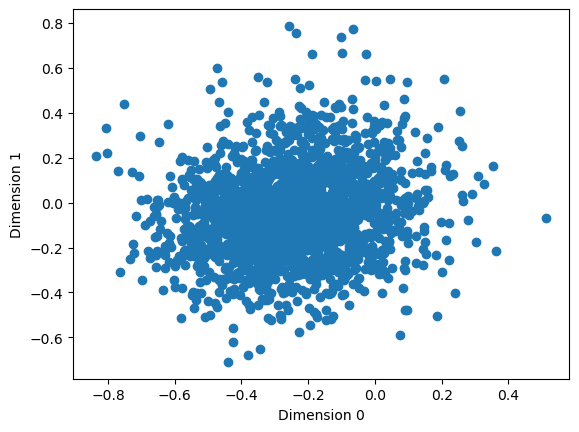

In [39]:
generate_reduce_dim_plots(red_emb, 0, 1)

In [51]:
def generate_scatter_plot_3d(mat, dim1, dim2, dim3, labels=None ,figsize=(15, 10), cmap='Pastel1'):
    my_cmap = plt.get_cmap(cmap)
    
    x = mat[:, dim1]
    y = mat[:, dim2]
    z = mat[:, dim3]
  
    temp_df = pd.DataFrame({
        'x'     : x,
        'y'     : y,
        'z'     : z,
        'label' : labels
    })
    
    fig = plt.figure()
    ax = fig.add_subplot(projection='3d')

    ax.scatter(x, y, z, c=pred)

    ax.set_xlabel(f"Dimension {dim1}")
    ax.set_ylabel(f"Dimension {dim2}")
    ax.set_zlabel(f"Dimension {dim3}")

    
    plt.show()

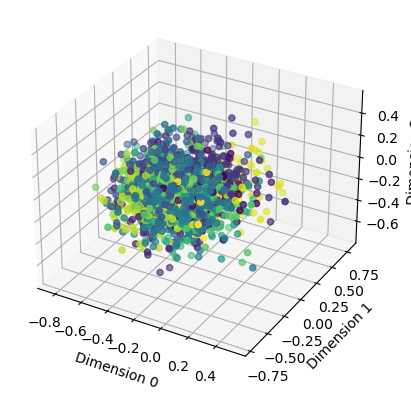

In [52]:
generate_scatter_plot_3d(red_emb, 0, 1, 2, labels=pred)